In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from random import sample, choice
%matplotlib inline
import pesummary
from pesummary.io import read
import h5py

In [2]:
file_name = '/Users/Oscar/Documents/Research/GW190521/GW190521.h5'
# Using pesummary
data = read(file_name)
print('Found run labels:')
print(data.labels)

Found run labels:
['C01:IMRPhenomPv3HM', 'C01:NRSur7dq4', 'C01:SEOBNRv4PHM', 'PrecessingSpinIMRHM', 'PublicationSamples']


In [3]:
samples_dict = data.samples_dict
posterior_samples = samples_dict['C01:NRSur7dq4']

parameters = sorted(list(posterior_samples.keys()))
print(parameters)

['H1_matched_filter_abs_snr', 'H1_matched_filter_snr', 'H1_matched_filter_snr_angle', 'H1_optimal_snr', 'H1_spcal_amp_0', 'H1_spcal_amp_1', 'H1_spcal_amp_2', 'H1_spcal_amp_3', 'H1_spcal_amp_4', 'H1_spcal_amp_5', 'H1_spcal_amp_6', 'H1_spcal_amp_7', 'H1_spcal_amp_8', 'H1_spcal_amp_9', 'H1_spcal_phase_0', 'H1_spcal_phase_1', 'H1_spcal_phase_2', 'H1_spcal_phase_3', 'H1_spcal_phase_4', 'H1_spcal_phase_5', 'H1_spcal_phase_6', 'H1_spcal_phase_7', 'H1_spcal_phase_8', 'H1_spcal_phase_9', 'H1_time', 'L1_matched_filter_abs_snr', 'L1_matched_filter_snr', 'L1_matched_filter_snr_angle', 'L1_optimal_snr', 'L1_spcal_amp_0', 'L1_spcal_amp_1', 'L1_spcal_amp_2', 'L1_spcal_amp_3', 'L1_spcal_amp_4', 'L1_spcal_amp_5', 'L1_spcal_amp_6', 'L1_spcal_amp_7', 'L1_spcal_amp_8', 'L1_spcal_amp_9', 'L1_spcal_phase_0', 'L1_spcal_phase_1', 'L1_spcal_phase_2', 'L1_spcal_phase_3', 'L1_spcal_phase_4', 'L1_spcal_phase_5', 'L1_spcal_phase_6', 'L1_spcal_phase_7', 'L1_spcal_phase_8', 'L1_spcal_phase_9', 'L1_time', 'V1_matched

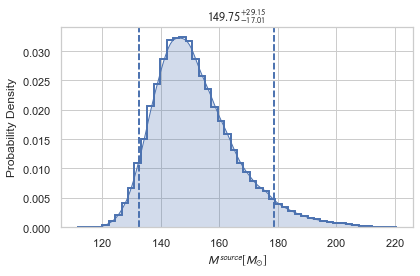

In [4]:
fig = posterior_samples.plot('total_mass_source', type='hist')
line = posterior_samples.plot('total_mass_source', type='hist',fig=fig, kde=True)
plt.show()

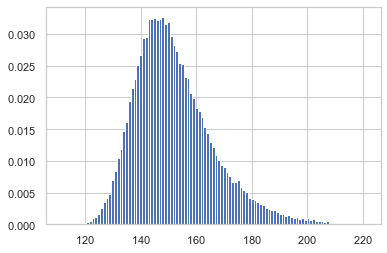

In [5]:
nremnant, binsremnant, _ = plt.hist(posterior_samples['total_mass_source'], bins = 109, density = True)
plt.show()

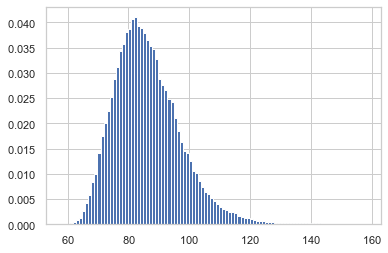

In [6]:
nm1, binsm1, _ = plt.hist(posterior_samples['mass_1_source'], bins = 100, density = True)
plt.show()

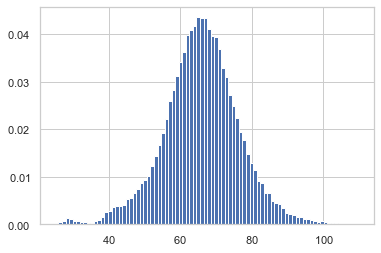

In [7]:
nm2, binsm2, _ = plt.hist(posterior_samples['mass_2_source'], bins = 86, density = True)
plt.show()

In [8]:
def Mrem(mass1,mass2):
    M0 = 0.951507
    K2d = 1.995246
    K4f = 2.980990
    MSum3 = mass1 + mass2
    n3 = (mass1 * mass2) / MSum3 
    dm3 = (mass1 - mass2) / MSum3
    
    if mass1 > mass2:
        
        if mass2/mass1 > 1/3:
            Mrem_Mass = ((4*n3) * (4*n3) * ( M0 + K2d*dm3**2 + K4f*dm3**4 ) + (1 + 17 * n3)*dm3**6) / MSum3
        else:
            Mrem_Mass = mass1 + mass2
    else: 
        Mrem_Mass = 0
            
    return Mrem_Mass


In [9]:
M1Random = []
M2Random = []

for _ in range(30000):
    selection = choice(posterior_samples['mass_1_source'])
    M1Random += [selection]
    
for _ in range(30000):
    selection2 = choice(posterior_samples['mass_2_source'])
    M2Random += [selection2]

In [10]:
GWRebuilt = []
for i in range(len(M1Random)):
        GWRebuilt += [Mrem(M1Random[i], M2Random[i]) * 1.045]

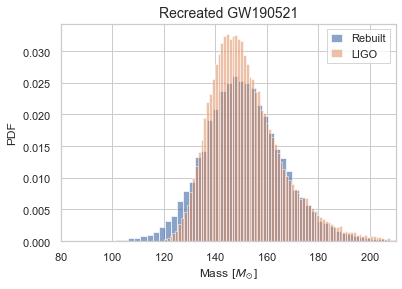

In [11]:
plt.hist(GWRebuilt, bins = 100, color = "C0", density = True, alpha = 0.65)
plt.hist(posterior_samples['total_mass_source'], bins = 100, color = "C1", density = True, alpha = 0.5)
plt.xlim(80,210)
plt.title('Recreated GW190521', fontsize = 14)
plt.xlabel('Mass [$M_\odot$]')
plt.ylabel('PDF')
plt.legend(labels = ['Rebuilt', 'LIGO'])
plt.show()

In [12]:
gw_masses = np.trunc(binsremnant[:-1])
gw_dist = nremnant
gw_zip = (list(zip(gw_masses, gw_dist)))
gw_df = pd.DataFrame(gw_zip, columns = ['gw_mass', 'gw_dist'])

In [13]:
gw_df

,gw_mass,gw_dist
0,111.0,0.000015
1,112.0,0.000000
2,113.0,0.000000
3,114.0,0.000000
4,115.0,0.000061
...,...,...
104,215.0,0.000045
105,216.0,0.000030
106,217.0,0.000015
107,218.0,0.000000


In [14]:
#define m1 and m2 merger
def MremArray(mass1,mass2):
    M0 = 0.951507
    K2d = 1.995246
    K4f = 2.980990
    
    sol_set = []
    
    for i in range(len(mass1)):
        MSum3 = mass1.item(i) + mass2.item(i)
        n3 = (mass1.item(i) * mass2.item(i)) / MSum3 
        dm3 = (mass1.item(i) - mass2.item(i)) / MSum3
        
        if mass1.item(i) > mass2.item(i):
        
            if mass2.item(i)/mass1.item(i) > 1/3:
                Mrem_Mass = ((4*n3) * (4*n3) * ( M0 + K2d*dm3**2 + K4f*dm3**4 ) + (1 + 17 * n3)*dm3**6) / MSum3
            else:
                Mrem_Mass = mass1.item(i) + mass2.item(i)
        else: 
            Mrem_Mass = 0
            
        sol_set += [Mrem_Mass]
    return sol_set




In [15]:
#set up array of masses
m1_array= []
for i in np.arange(5,200,.5):
    m1_array += [i]
    
m2_array= []
for i in np.arange(5,200,.5):
    m2_array += [i]
    
#create array of solution set
xcoor = []
ycoor = []
for i in m1_array:
    for j in m2_array:
        if i > j:
            xcoor += [i]
            ycoor += [j]



Mrem_sol = np.around((MremArray(np.array(xcoor),np.array(ycoor))),2)

Merger = pd.DataFrame(list(zip(xcoor,ycoor,np.round(Mrem_sol))), columns = ['Primary','Secondary','Remnant'])




In [16]:
Merger

,Primary,Secondary,Remnant
0,5.5,5.0,10.0
1,6.0,5.0,10.0
2,6.0,5.5,11.0
3,6.5,5.0,11.0
4,6.5,5.5,11.0
...,...,...,...
75850,199.5,197.0,377.0
75851,199.5,197.5,378.0
75852,199.5,198.0,378.0
75853,199.5,198.5,379.0


In [17]:
gw = gw_df.merge(Merger, left_on = 'gw_mass', right_on = 'Remnant')
gw

,gw_mass,gw_dist,Primary,Secondary,Remnant
0,111.0,0.000015,58.5,58.0,111.0
1,111.0,0.000015,59.0,57.5,111.0
2,111.0,0.000015,59.0,58.0,111.0
3,111.0,0.000015,59.5,57.0,111.0
4,111.0,0.000015,59.5,57.5,111.0
...,...,...,...,...,...
35226,219.0,0.000015,197.5,21.5,219.0
35227,219.0,0.000015,198.0,21.0,219.0
35228,219.0,0.000015,198.5,20.5,219.0
35229,219.0,0.000015,199.0,20.0,219.0


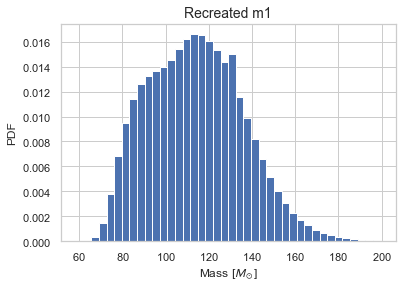

In [18]:
plt.hist(gw['Primary'], weights = gw['gw_dist'], bins = 40, density = True)
plt.title('Recreated m1', fontsize = 14)
plt.xlabel('Mass [$M_\odot$]')
plt.ylabel('PDF')
plt.show()

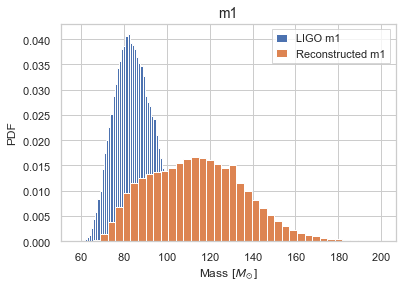

In [19]:
plt.hist(posterior_samples['mass_1_source'], bins = 100, density = True)
plt.hist(gw['Primary'], weights = gw['gw_dist'], bins = 40, density = True)
plt.legend(labels = ['LIGO m1', 'Reconstructed m1'])
plt.title('m1', fontsize = 14)
plt.xlabel('Mass [$M_\odot$]')
plt.ylabel('PDF')
plt.show()

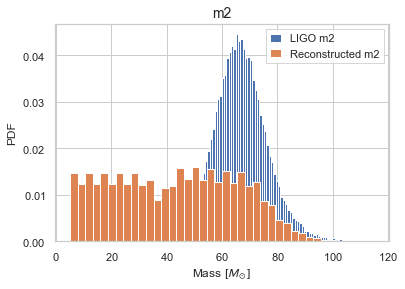

In [20]:
plt.hist(posterior_samples['mass_2_source'], bins = 100, density = True)
plt.hist(gw['Secondary'], weights = gw['gw_dist'], bins = 40, density = True)
plt.legend(labels = ['LIGO m2', 'Reconstructed m2'])
plt.title('m2', fontsize = 14)
plt.xlabel('Mass [$M_\odot$]')
plt.ylabel('PDF')
plt.show()

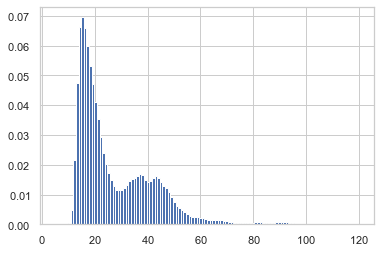

In [21]:
PiMk_ = [0, 0, 0, 0, 10, 1602, 26590, 116499, 257636, 358987, 377518, 357822, 325263, 288021, 255447, 222427, 191704, 159710, 130144, 109248, 93558, 80949, 69952, 63429, 61679, 62859, 65442, 71019, 78420, 82142, 84122, 88451, 91929, 89306, 81277, 76343, 79161, 84602, 88042, 85313, 77016, 70348, 66021, 58791, 48875, 40049, 33548, 29239, 25608, 21889, 18239, 15238, 13851, 13437, 13073, 12008, 10601, 9264, 8143, 7268, 7292, 7630, 7489, 7216, 6457, 5769, 4857, 3659, 2825, 2621, 2630, 2623, 2892, 3200, 3094, 3078, 3666, 3681, 3330, 3209, 2812, 2308, 2214, 2576, 3321, 4074, 4053, 3876, 3506, 2658, 1911, 1373, 1099, 917, 798, 667, 547, 513, 472, 409, 350, 332, 285, 237, 209, 169, 135, 96, 88, 90, 62, 35, 25, 21, 14, 13]
Massk = np.arange(5,121,1)

#distribution of PiMk 

npimk, binspimk, _pimk = plt.hist(Massk, weights = PiMk_, bins = len(PiMk_), density = True)

pimk_masses = np.trunc(binspimk[1:-1])
pimk_dist = npimk[1:]
pimk_zip = (list(zip(pimk_masses, pimk_dist)))
pimk_df = pd.DataFrame(pimk_zip, columns = ['pimk_mass', 'pimk'])




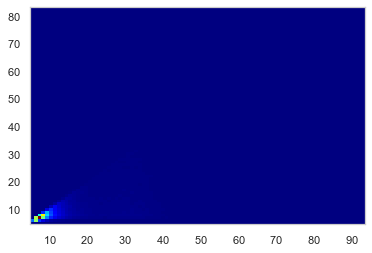

In [22]:
#pi(m1i,m2j)
#Joint Astrophysical Distribution

df1 = pd.read_csv('/Users/Oscar/Documents/Research/GW190521/bbh_pop_samples_z1_more_data_v1.dat', delim_whitespace = True, index_col = None)
m1_powerlaw = df1['#']
m2_powerlaw = df1['m1']
M, xe, ye, img = plt.hist2d(m1_powerlaw, m2_powerlaw, bins = (87,78), cmap = plt.cm.jet, density =True)
plt.show()

ydist = []
sum = 0
for i in np.arange(len(M.T)):
    for j in np.arange(len(M.T[i])):
        sum = sum + (M.T[i,j])
    ydist += [sum]
    sum = 0
    
xdist = []
sum = 0
for i in np.arange(len(M)):
    for j in np.arange(len(M[i])):
        sum = sum + (M[i,j])
    xdist += [sum]
    sum = 0
    
#x bin length
binx = xe[1] - xe[0]
#y bin length
biny = ye[1] - ye[0]

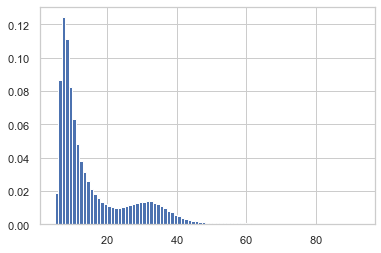

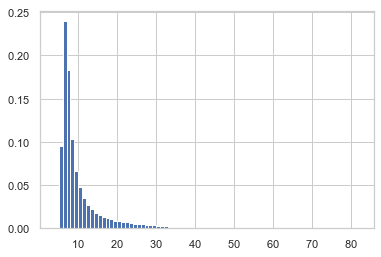

In [23]:
npiy, binspiy, _piy = plt.hist(xe[:-1], weights = xdist, bins = 87)
plt.show()

npix, binspix, _pix =plt.hist(ye[:-1], weights = ydist, bins = 78)
plt.show()

In [24]:
#pi(m1i, m2j)
piastropri_masses = np.trunc(binspiy[1:-1])
piastropri_dist = npiy[1:]
piastropri_zip = (list(zip(piastropri_masses, piastropri_dist)))
piastropri_df = pd.DataFrame(piastropri_zip, columns = ['piastroprimary_mass', 'astroprimary'])

piastrosec_masses = np.trunc(binspix[1:-1])
piastrosec_dist = npix[1:]
piastrosec_zip = (list(zip(piastrosec_masses, piastrosec_dist)))
piastrosec_df = pd.DataFrame(piastrosec_zip, columns = ['piastrosecondary_mass', 'astrosecondary'])

In [25]:
def Mrem(mass1,mass2):
    M0 = 0.951507
    K2d = 1.995246
    K4f = 2.980990
    MSum3 = mass1 + mass2
    n3 = (mass1 * mass2) / MSum3 
    dm3 = (mass1 - mass2) / MSum3
    
    if mass1 > mass2:
        
        if mass2/mass1 > 1/3:
            Mrem_Mass = ((4*n3) * (4*n3) * ( M0 + K2d*dm3**2 + K4f*dm3**4 ) + (1 + 17 * n3)*dm3**6) / MSum3
        else:
            Mrem_Mass = mass1 + mass2
    else: 
        Mrem_Mass = 0
            
    return Mrem_Mass

def PMkBinary(mass1, mass2, Massk, binMass):
    
    Mremnant = (Mrem(mass1, mass2))
        
    if (Mremnant - binMass) <= Massk <= (Mremnant + binMass): 
        Pmkbin = 1
    else: 
        Pmkbin = 0
        
    return Pmkbin

def prob_m(piastro, pmk, pimk):
    prob = (piastro) * (pmk / pimk)
    return prob

In [26]:
#merger data

primary_array = np.arange(5,92)
secondary_array = np.arange(5,82)

primary = []
secondary = [] 
remnant = []

import time
tstart = time.time()

finalarray = np.arange(5,121,1)

for k in finalarray:
    for i in primary_array:
        for j in secondary_array:
        
            if PMkBinary(i, j, k, .5) == 1:
                
                primary += [i]
                secondary += [j]
                remnant += [k]
            

print("Elapsed time: {:.2f}".format(time.time()-tstart)+" seconds")

Elapsed time: 8.01 seconds


In [27]:
mass_combinations = pd.DataFrame(list(zip(primary, secondary, remnant)), columns = ['primary', 'secondary', 'remnant'])

In [28]:
m1df = mass_combinations.merge(gw_df, left_on = 'remnant', right_on = 'gw_mass')
m1df = m1df.merge(pimk_df, left_on = 'remnant', right_on = 'pimk_mass')
m1df = m1df.merge(piastropri_df, left_on = 'primary', right_on = 'piastroprimary_mass')
m1df = m1df.drop(columns = ['gw_mass', 'pimk_mass', 'piastroprimary_mass'])

m2df = mass_combinations.merge(gw_df, left_on = 'remnant', right_on = 'gw_mass')
m2df = m2df.merge(pimk_df, left_on = 'remnant', right_on = 'pimk_mass')
m2df = m2df.merge(piastrosec_df, left_on = 'secondary', right_on = 'piastrosecondary_mass')
m2df = m2df.drop(columns = ['gw_mass', 'pimk_mass', 'piastrosecondary_mass'])

In [29]:
probabilitym1 = []
probabilitym2 = []

for i in range(len(m1df['primary'])):
    probabilitym1 += [prob_m(m1df['astroprimary'][i], 
                           m1df['gw_dist'][i], m1df['pimk'][i])]
    
for i in range(len(m2df['primary'])):
    probabilitym2 += [prob_m(m2df['astrosecondary'][i], 
                           m2df['gw_dist'][i], m2df['pimk'][i])]
    
m1df['probabilitym1'] = probabilitym1
m2df['probabilitym2'] = probabilitym2

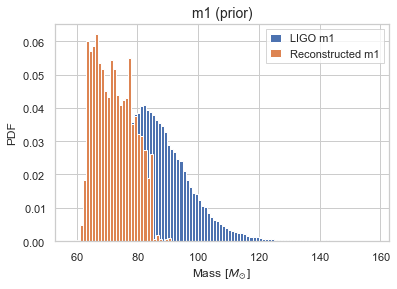

In [30]:
import seaborn as sns

fig = plt.figure()
ax = fig.add_subplot(1,1,1)


plt.hist(posterior_samples['mass_1_source'], bins = 100, density = True)


plt.hist(m1df['primary'], weights = m1df['probabilitym1'], bins = 32, density = True)

plt.legend(labels = ['LIGO m1', 'Reconstructed m1'])
plt.title('m1 (prior)', fontsize = 14)
plt.xlabel('Mass [$M_\odot$]')
plt.ylabel('PDF')

plt.show()

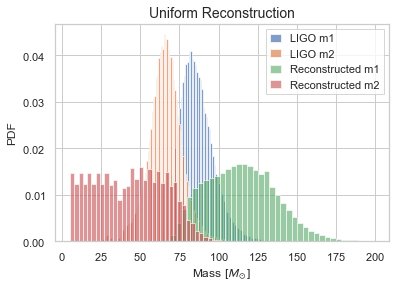

In [38]:
plt.hist(posterior_samples['mass_1_source'], bins = 100, density = True, alpha = 0.7)
plt.hist(posterior_samples['mass_2_source'], bins = 100, density = True, alpha = 0.7)
plt.hist(gw['Primary'], weights = gw['gw_dist'], bins = 40, density = True, alpha = 0.6)
plt.hist(gw['Secondary'], weights = gw['gw_dist'], bins = 40, density = True, alpha = 0.6)
plt.legend(labels = ['LIGO m1','LIGO m2', 'Reconstructed m1','Reconstructed m2'])
plt.title('Uniform Reconstruction', fontsize = 14)
plt.xlabel('Mass [$M_\odot$]')
plt.ylabel('PDF')
plt.show()

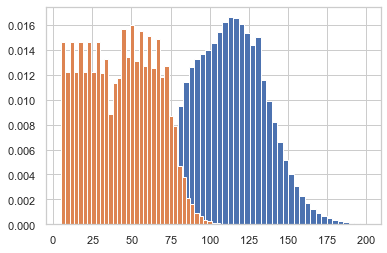

In [39]:
nm1rec, binsm1rec, _ = plt.hist(gw['Primary'], weights = gw['gw_dist'], bins = 40, density = True)
nm2rec, binsm2rec, _ = plt.hist(gw['Secondary'], weights = gw['gw_dist'], bins = 40, density = True)

In [47]:
M1rec = gw['Primary']
M2rec = gw['Secondary']

In [48]:
GWRebuiltrec = []
for i in range(len(M1rec)):
        GWRebuiltrec += [Mrem(M1rec[i], M2rec[i])]

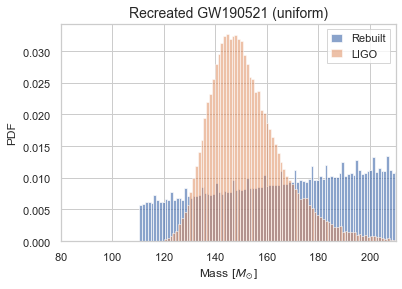

In [53]:
plt.hist(GWRebuiltrec, bins = 100, color = "C0", density = True, alpha = 0.65)
plt.hist(posterior_samples['total_mass_source'], bins = 100, color = "C1", density = True, alpha = 0.5)
plt.xlim(80,210)
plt.title('Recreated GW190521 (uniform)', fontsize = 14)
plt.xlabel('Mass [$M_\odot$]')
plt.ylabel('PDF')
plt.legend(labels = ['Rebuilt', 'LIGO'])
plt.show()

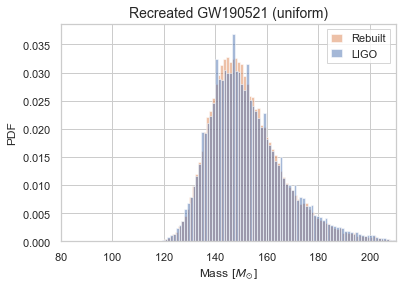

In [56]:
plt.hist(posterior_samples['total_mass_source'], bins = 100, color = "C1", density = True, alpha = 0.5)
plt.hist(GWRebuiltrec, bins = 100, color = "C0", density = True, weights = gw['gw_dist'], alpha = 0.5)
plt.xlim(80,210)
plt.title('Recreated GW190521 (uniform)', fontsize = 14)
plt.xlabel('Mass [$M_\odot$]')
plt.ylabel('PDF')
plt.legend(labels = ['Rebuilt', 'LIGO'])
plt.show()